## 🛠️ 1. Loading Libraries
*Importing all necessary Python libraries such as pandas, numpy, seaborn, matplotlib, etc.*

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


## 📥 2. Loading the Dataset
*Reading the Titanic dataset using pd.read_csv() and displaying the first few rows.*

In [6]:
from google.colab import files
uploaded= files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [8]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 🧼 3. Data Cleaning and Preprocessing
*Handling missing values, dropping columns, and formatting data (e.g., converting data types or encoding categorical variables).*

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# for categorical data
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [14]:
train_df.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
train_df.groupby(['Sex'], as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [16]:
train_df.groupby(['SibSp'], as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [20]:
train_df.groupby(['Parch'], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


## 🧠 4. Feature Engineering
*Creating new features or modifying existing ones (like extracting titles from names, creating family size, etc.).*

In [21]:
#Adding family size column
train_df['Family_Size']= train_df['SibSp']+ train_df['Parch']+1
test_df['Family_Size']= train_df['SibSp']+ train_df['Parch']+1

In [22]:
train_df.groupby(['Family_Size'], as_index=False)['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [24]:
#family size grouped
family_map = {
    1: 'Alone',
    2: 'Small',
    3: 'Small',
    4: 'Small',
    5: 'Medium',
    6: 'Medium',
    7: 'Large',
    8: 'Large',
    11: 'Large'
}

train_df['Family_Size_Grouped'] = train_df['Family_Size'].map(family_map)
test_df['Family_Size_Grouped'] = train_df['Family_Size'].map(family_map)

In [25]:
train_df.groupby(['Family_Size_Grouped'], as_index=False)['Survived'].mean()

,Family_Size_Grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


In [26]:
train_df.groupby(['Family_Size_Grouped'], as_index=False)['Survived'].mean()

,Family_Size_Grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


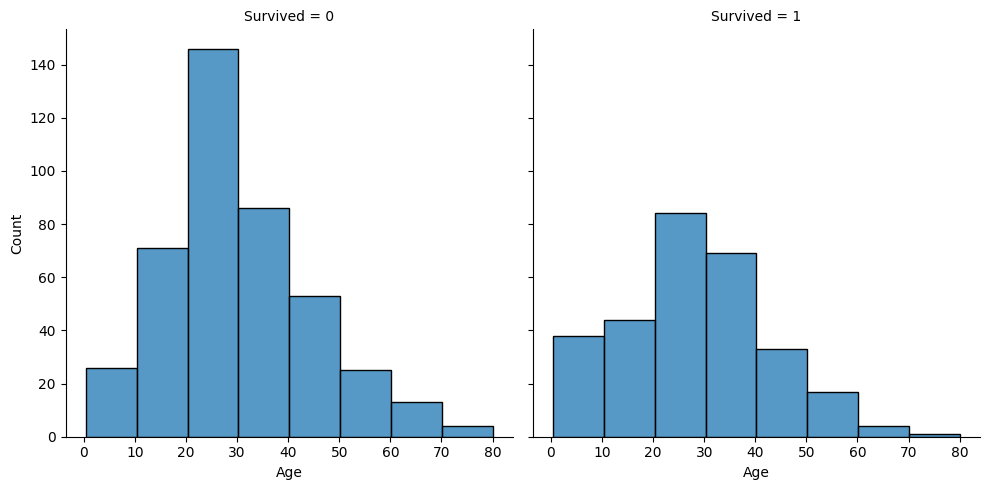

In [27]:
#graphs
sns.displot(train_df, x='Age', col='Survived', binwidth=10, height=5)

In [28]:
train_df['Age_cut']= pd.qcut(train_df['Age'],8)
test_df['Age_cut']= pd.qcut(test_df['Age'],8)

In [29]:
train_df.groupby(['Age_cut'], as_index=False)['Survived'].mean()

,Age_cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [30]:
train_df.loc[train_df['Age'] <= 16, 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 20.125), 'Age'] = 1
train_df.loc[(train_df['Age'] > 20.125) & (train_df['Age'] <= 24), 'Age'] = 2
train_df.loc[(train_df['Age'] > 24) & (train_df['Age'] <= 28), 'Age'] = 3  # fixed 'train_d'
train_df.loc[(train_df['Age'] > 28) & (train_df['Age'] <= 32.312), 'Age'] = 4
train_df.loc[(train_df['Age'] > 32.312) & (train_df['Age'] <= 38), 'Age'] = 5
train_df.loc[(train_df['Age'] > 38) & (train_df['Age'] <= 47), 'Age'] = 6
train_df.loc[(train_df['Age'] > 47) & (train_df['Age'] <= 80), 'Age'] = 7
train_df.loc[train_df['Age'] > 80, 'Age']

,Age


In [31]:
test_df.loc[test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 20.125), 'Age'] = 1
test_df.loc[(test_df['Age'] > 20.125) & (test_df['Age'] <= 24), 'Age'] = 2
test_df.loc[(test_df['Age'] > 24) & (test_df['Age'] <= 28), 'Age'] = 3
test_df.loc[(test_df['Age'] > 28) & (test_df['Age'] <= 32.312), 'Age'] = 4
test_df.loc[(test_df['Age'] > 32.312) & (test_df['Age'] <= 38), 'Age'] = 5
test_df.loc[(test_df['Age'] > 38) & (test_df['Age'] <= 47), 'Age'] = 6
test_df.loc[(test_df['Age'] > 47) & (test_df['Age'] <= 80), 'Age'] = 7
test_df.loc[test_df['Age'] > 80, 'Age']

,Age


In [32]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]"


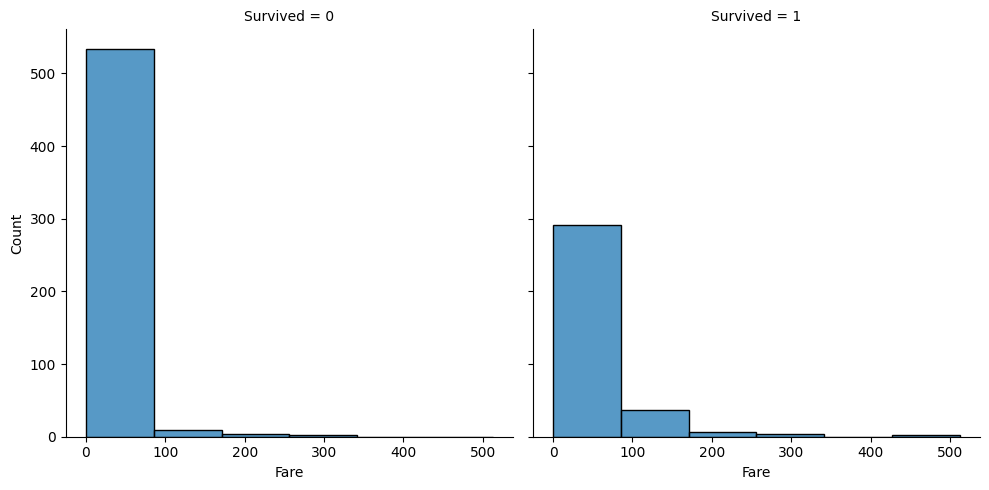

In [35]:
sns.displot(train_df, x="Fare",col="Survived", binwidth=80,height=5)

In [36]:
train_df['Fare_cut']= pd.qcut(train_df['Fare'],6)
test_df['Fare_cut']= pd.qcut(test_df['Fare'],6)

In [39]:
train_df.groupby(["Fare_cut"], as_index=False)['Survived'].mean()

,Fare_cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [40]:
train_df.loc[train_df['Fare'] <= 7.775, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.775) & (train_df['Fare'] <= 8.662), 'Age'] = 1
train_df.loc[(train_df['Fare'] > 8.662) & (train_df['Fare'] <=  14.454), 'Age'] = 2
train_df.loc[(train_df['Fare'] >  14.454) & (train_df['Fare'] <= 26.0), 'Age'] = 3  # fixed 'train_d'
train_df.loc[(train_df['Fare'] > 26.0) & (train_df['Fare'] <= 52.369), 'Age'] = 4
train_df.loc[(train_df['Fare'] > 52.369) & (train_df['Fare'] <= 512.329), 'Age'] = 5

train_df.loc[train_df['Fare'] > 512.329, 'Fare']

,Fare
258,512.3292
679,512.3292
737,512.3292


In [41]:
test_df.loc[train_df['Fare'] <= 7.775, 'Fare'] = 0
test_df.loc[(train_df['Fare'] > 7.775) & (test_df['Fare'] <= 8.662), 'Age'] = 1
test_df.loc[(train_df['Fare'] > 8.662) & (test_df['Fare'] <=  14.454), 'Age'] = 2
test_df.loc[(train_df['Fare'] >  14.454) & (test_df['Fare'] <= 26.0), 'Age'] = 3  # fixed 'train_d'
test_df.loc[(train_df['Fare'] > 26.0) & (test_df['Fare'] <= 52.369), 'Age'] = 4
test_df.loc[(train_df['Fare'] > 52.369) & (test_df['Fare'] <= 512.329), 'Age'] = 5

train_df.loc[train_df['Fare'] > 512.329, 'Fare']

,Fare
258,512.3292
679,512.3292
737,512.3292


In [42]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_cut,Fare_cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0000,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,1.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]"


In [43]:
#Titles
train_df['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [44]:
#Titles
train_df['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [45]:
#Titles
train_df['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [46]:
#military Capt, Col, Major
#noble - Jonkheer, the Countess, Don, Lady, Sir
#unmaried Female Mlle, Ms. Mme

In [54]:
# Extract Title from the 'Name' column in train_df
train_df['Title'] = train_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Now, apply the replace method to train_df
train_df['Title']= train_df['Title'].replace({
    'Capt':'Military',
    'Col': 'Military',
    'Major':'Military',
    'Jonkheer':'Noble',
    'the Countess':'Noble',
    'Don':'Noble',
    'Lady':'Noble',
    'Sir': 'Noble',
    'Mlle':'Noble',
    'Ms':'Noble',
    'Mme':'Noble'
})

In [56]:
# Extract Title from the 'Name' column in test_df
test_df['Title'] = test_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Now, apply the replace method
test_df['Title']= test_df['Title'].replace({
    'Capt':'Military',
    'Col': 'Military',
    'Major':'Military',
    'Jonkheer':'Noble',
    'the Countess':'Noble',
    'Don':'Noble',
    'Lady':'Noble',
    'Sir': 'Noble',
    'Mlle':'Noble',
    'Ms':'Noble',
    'Mme':'Noble'
})

In [57]:
train_df.groupby(["Title"], as_index=False)['Survived'].agg(['count','mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,182,0.697802
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Noble,9,0.777778
7,Rev,6,0.000000


In [58]:
train_df['Name_Length']=train_df['Name'].apply(lambda x: len(x))
test_df['Name_Length']=test_df['Name'].apply(lambda x: len(x))

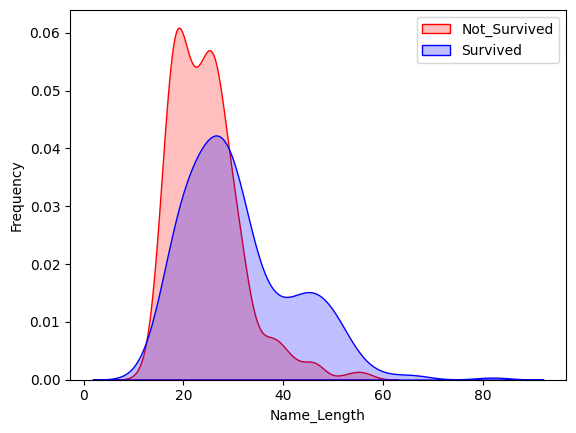

In [59]:
g= sns.kdeplot(train_df['Name_Length'][(train_df['Survived']==0) & (train_df['Name_Length'].notnull())], color='Red', fill=True)
g= sns.kdeplot(train_df['Name_Length'][(train_df['Survived']==1) & (train_df['Name_Length'].notnull())], ax=g, color='Blue', fill=True)
g.set_xlabel('Name_Length')
g.set_ylabel('Frequency')
g= g.legend(['Not_Survived', 'Survived'])

In [60]:
train_df['Name_LengthGB']= pd.qcut(train_df['Name_Length'],8)
test_df['Name_LengthGB']= pd.qcut(test_df['Name_Length'],6)

In [61]:
train_df.groupby(['Name_LengthGB'], as_index=False)['Survived'].mean()

,Name_LengthGB,Survived
0,"(11.999, 18.0]",0.214286
1,"(18.0, 20.0]",0.252427
2,"(20.0, 23.0]",0.307692
3,"(23.0, 25.0]",0.346939
4,"(25.0, 27.25]",0.292929
5,"(27.25, 30.0]",0.428571
6,"(30.0, 38.0]",0.517241
7,"(38.0, 82.0]",0.745283


In [62]:
train_df.loc[train_df['Name_Length'] <= 18, 'Name_size']= 0
train_df.loc[(train_df['Name_Length'] > 18) & (train_df['Name_Length'] <= 20), 'Name_size'] = 1
train_df.loc[(train_df['Name_Length'] > 20) & (train_df['Name_Length'] <= 23), 'Name_size'] = 2
train_df.loc[(train_df['Name_Length'] > 23) & (train_df['Name_Length'] <= 25), 'Name_size'] = 3  # fixed 'train_d'
train_df.loc[(train_df['Name_Length'] > 25) & (train_df['Name_Length'] <= 27.25), 'Name_size'] = 4
train_df.loc[(train_df['Name_Length'] > 27.25) & (train_df['Name_Length'] <= 30), 'Name_size'] = 5
train_df.loc[(train_df['Name_Length'] > 30) & (train_df['Name_Length'] <= 38), 'Name_size'] = 6
train_df.loc[(train_df['Name_Length'] > 38) & (train_df['Name_Length'] <= 82), 'Name_size'] = 7
train_df.loc[train_df['Name_Length'] > 82, 'Name_size']

,Name_size


In [63]:
test_df.loc[test_df['Name_Length'] <= 18, 'Name_size'] = 0
test_df.loc[(test_df['Name_Length'] > 18) & (test_df['Name_Length'] <= 20), 'Name_size'] = 1
test_df.loc[(test_df['Name_Length'] > 20) & (test_df['Name_Length'] <= 23), 'Name_size'] = 2
test_df.loc[(test_df['Name_Length'] > 23) & (test_df['Name_Length'] <= 25), 'Name_size'] = 3
test_df.loc[(test_df['Name_Length'] > 25) & (test_df['Name_Length'] <= 27.25), 'Name_size'] = 4
test_df.loc[(test_df['Name_Length'] > 27.25) & (test_df['Name_Length'] <= 30), 'Name_size'] = 5
test_df.loc[(test_df['Name_Length'] > 30) & (test_df['Name_Length'] <= 38), 'Name_size'] = 6
test_df.loc[(test_df['Name_Length'] > 38) & (test_df['Name_Length'] <= 82), 'Name_size'] = 7
test_df.loc[test_df['Name_Length'] > 82, 'Name_size']

,Name_size


In [64]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_cut,Fare_cut,Title,Name_Length,Name_LengthGB,Name_size
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0000,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0
4,5,0,3,"Allen, Mr. William Henry",male,1.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0


In [65]:
#tickets
train_df['Ticket']

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
...,...
886,211536
887,112053
888,W./C. 6607
889,111369


In [66]:
train_df['Ticket_Number']=train_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))
test_df['Ticket_Number']=test_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))

In [67]:
train_df.groupby(["Ticket_Number"], as_index=False)['Survived'].agg(['count','mean']).sort_values('count', ascending=False)

,Ticket_Number,count,mean
94,1601,7,0.714286
196,2343,7,0.000000
464,347082,7,0.000000
468,347088,6,0.000000
358,3101295,6,0.000000
...,...,...,...
276,2667,1,1.000000
278,2669,1,0.000000
279,26707,1,0.000000
280,2671,1,0.000000


In [68]:
train_df['TicketNumberCounts']=train_df.groupby('Ticket_Number',)['Ticket_Number'].transform('count')
test_df['TicketNumberCounts']=test_df.groupby('Ticket_Number')['Ticket_Number'].transform('count')

In [69]:
train_df.groupby(["TicketNumberCounts",'Family_Size_Grouped'], as_index=False)['Survived'].agg(['count','mean']).sort_values('count', ascending=False)


,TicketNumberCounts,Family_Size_Grouped,count,mean
0,1,Alone,459,0.267974
6,2,Small,144,0.611111
3,1,Small,83,0.433735
9,3,Small,47,0.702128
4,2,Alone,42,0.404762
7,3,Alone,18,0.722222
12,4,Medium,16,0.125000
13,4,Small,15,0.800000
20,7,Large,14,0.000000
18,6,Medium,12,0.000000


In [70]:
# For train_df
train_df['Cabin'] = train_df['Cabin'].fillna('U')
train_df['Cabin'] = train_df['Cabin'].apply(lambda x: x[0] if isinstance(x, str) else 'x')

# For test_df
test_df['Cabin'] = test_df['Cabin'].fillna('U')
test_df['Cabin'] = test_df['Cabin'].apply(lambda x: x[0] if isinstance(x, str) else 'x')



In [71]:
train_df.groupby(['Cabin'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [72]:
train_df['Cabin_Assigned'] = train_df ['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
test_df['Cabin_Assigned'] = test_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)

In [73]:
train_df['Cabin_Assigned'] = train_df ['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
test_df['Cabin_Assigned'] = test_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)

In [74]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Family_Size_Grouped,Age_cut,Fare_cut,Title,Name_Length,Name_LengthGB,Name_size,Ticket_Number,TicketNumberCounts,Cabin_Assigned
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0000,...,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0,21171,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,...,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0,17599,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,...,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0,3101282,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,53.1000,...,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0,113803,2,1
4,5,0,3,"Allen, Mr. William Henry",male,1.0,0,0,373450,8.0500,...,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0,373450,1,0


In [75]:
train_df.shape

(891, 23)

In [76]:
test_df.shape

(418, 22)

In [77]:
# model prep

In [78]:
train_df.describe, test_df.describe

(<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex  Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  2.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  5.0      1   
 2                               Heikkinen, Miss. Laina  female  1.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  5.0      1   
 4                             Allen, Mr. William Henry    male  1.0      0   
 ..                   

In [ ]:
train_df.info

In [80]:
test_df.info

<bound method DataFrame.info of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex  Age  SibSp  Parch              Ticket      Fare Cabin  ...  \
0      male  5.0      0      0              330911    0.0000     U  ...   
1    female  5.0      1      0              363272    7.0000     U  ...   
2      male  7.0      0      0              240276    9.6875     U  ...   
3      male  5.0      0      0              315154    8.6625     U  ...   
4    female  2.0      1      1             3101298   12.2875     U  ...   
..      ...  ...    ...    ...                 ...       ...   ...  ...   
413    male  NaN      0      0           A.5. 3236    0.0000     U  ...   
414  female  6.0      0      0            PC 17758  108.9000     C  ...   
415    male  1.0      0      0  SOTON/O.Q. 3101262    7.2500     U  ...   
416    male  4.0      0      0              359309    8.0500     U  ...   
417    male  NaN      1      1                2668   22.3583     U  ...   

    Family_Size_Grouped       Age_cut           Fare_cut   Title Name_Length  \
0                 Small  (32.0, 39.0]     (7.758, 8.662]      Mr          16   
1                 Small  (39.0, 48.0]    (-0.001, 7.758]     Mrs          32   
2                 Alone  (48.0, 76.0]    (8.662, 14.454]      Mr          25   
3                 Small  (24.0, 27.0]     (7.758, 8.662]      Mr          16   
4                 Alone  (21.0, 24.0]    (8.662, 14.454]     Mrs          44   
..                  ...           ...                ...     ...         ...   
413               Alone           NaN     (7.758, 8.662]      Mr          18   
414               Alone  (32.0, 39.0]  (56.144, 512.329]    Dona          28   
415               Alone  (32.0, 39.0]    (-0.001, 7.758]      Mr          28   
416               Small           NaN     (7.758, 8.662]      Mr          19   
417               Small           NaN     (14.454, 26.0]  Master          24   

      Name_LengthGB  Name_size Ticket_Number  TicketNumberCounts  \
0    (12.999, 18.5]        0.0        330911                   1   
1      (28.0, 37.0]        6.0        363272                   1   
2      (22.0, 25.0]        3.0        240276                   1   
3    (12.999, 18.5]        0.0        315154                   1   
4      (37.0, 63.0]        7.0       3101298                   1   
..              ...        ...           ...                 ...   
413  (12.999, 18.5]        0.0          3236                   1   
414    (25.0, 28.0]        5.0         17758                   1   
415    (25.0, 28.0]        5.0       3101262                   1   
416    (18.5, 22.0]        1.0        359309                   1   
417    (22.0, 25.0]        3.0          2668                   1   

    Cabin_Assigned  
0                0  
1                0  
2                0  
3                0  
4                0  
..             ...  
413              0  
414              1  
415              0  
416              0  
417              0  

[418 rows x 22 columns]>

In [82]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size',
       'Family_Size_Grouped', 'Age_cut', 'Fare_cut', 'Title', 'Name_Length',
       'Name_LengthGB', 'Name_size', 'Ticket_Number', 'TicketNumberCounts',
       'Cabin_Assigned'],
      dtype='object')

In [83]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size',
       'Family_Size_Grouped', 'Age_cut', 'Fare_cut', 'Title', 'Name_Length',
       'Name_LengthGB', 'Name_size', 'Ticket_Number', 'TicketNumberCounts',
       'Cabin_Assigned'],
      dtype='object')

In [84]:
#filling in NA values
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)

test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

## 🔍 5. Exploratory Data Analysis (EDA)
*Visualizing and understanding the data using plots (like survival rate by gender, class, fare distribution, etc.).*

Text(0.5, 1.0, 'Survival Count')

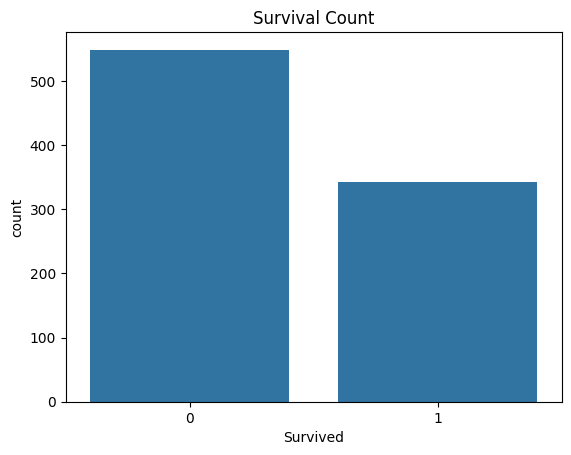

In [195]:
#Target variable- Survived
sns.countplot(data=train_df, x='Survived')
plt.title('Survival Count')


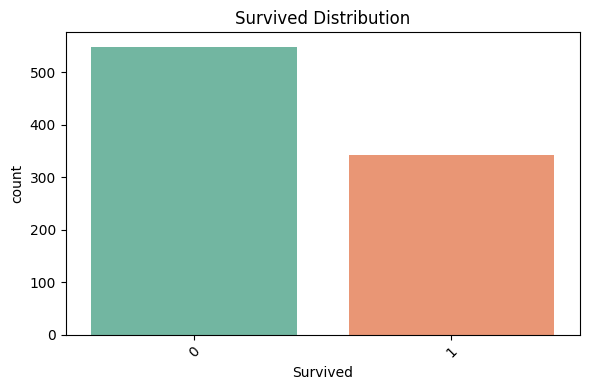

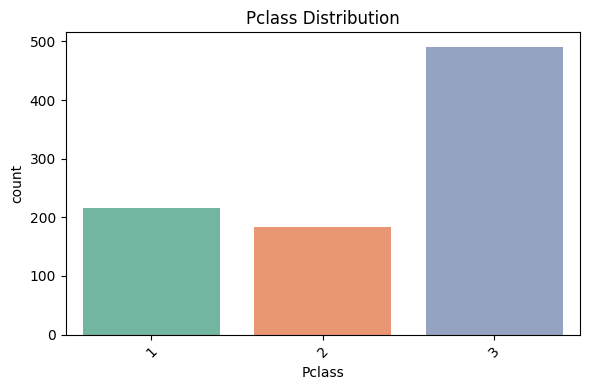

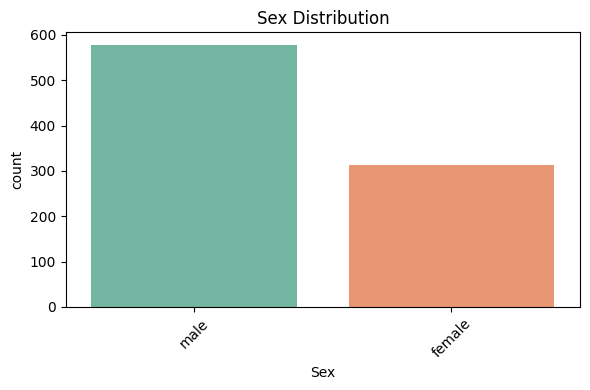

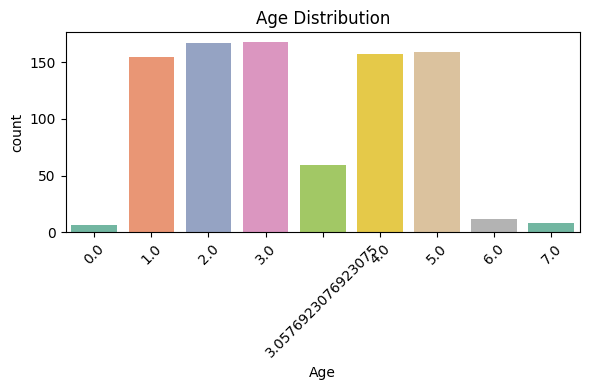

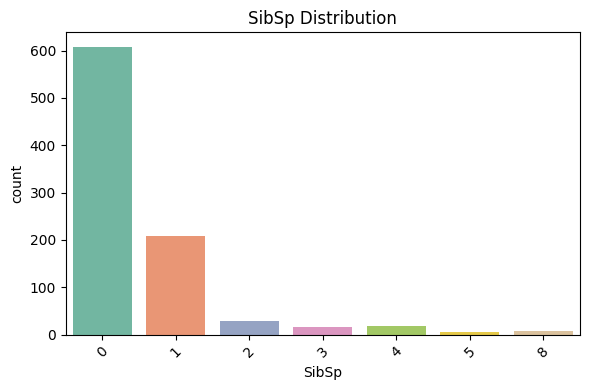

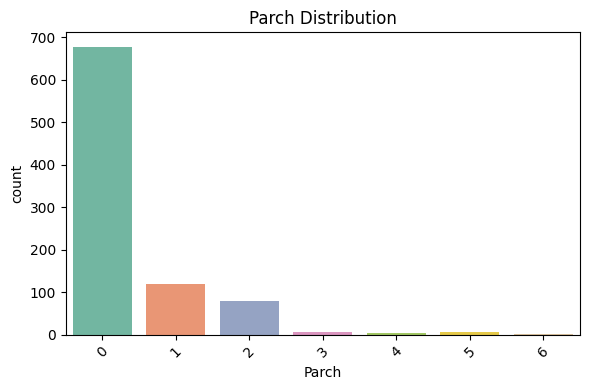

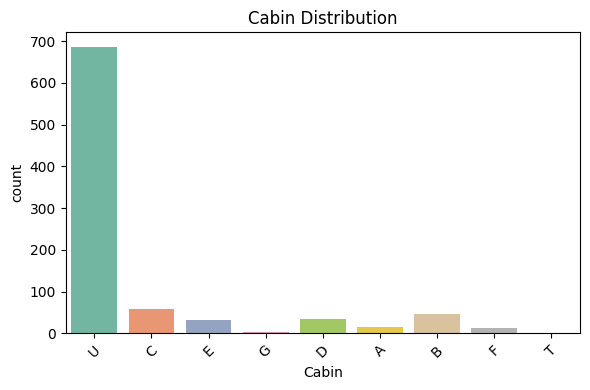

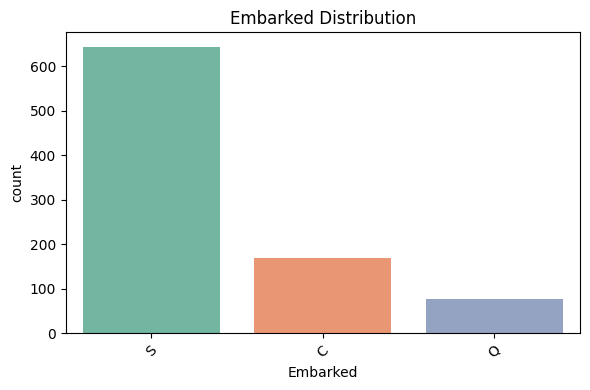

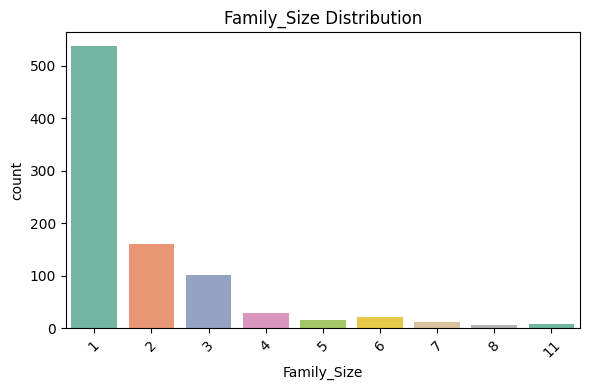

In [196]:
demo_cols= ['PassengerId', 'Survived', 'Pclass','Sex', 'Age', 'SibSp',
       'Parch','Cabin', 'Embarked', 'Family_Size']

for col in demo_cols[1:]:
  plt.figure(figsize=(6,4))
  sns.countplot(data=train_df, x=col, palette='Set2')
  plt.title(f"{col} Distribution")
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [197]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size',
       'Family_Size_Grouped', 'Age_cut', 'Fare_cut', 'Title', 'Name_Length',
       'Name_LengthGB', 'Name_size', 'Ticket_Number', 'TicketNumberCounts',
       'Cabin_Assigned', 'Ticket_Prefix', 'Log_Fare'],
      dtype='object')

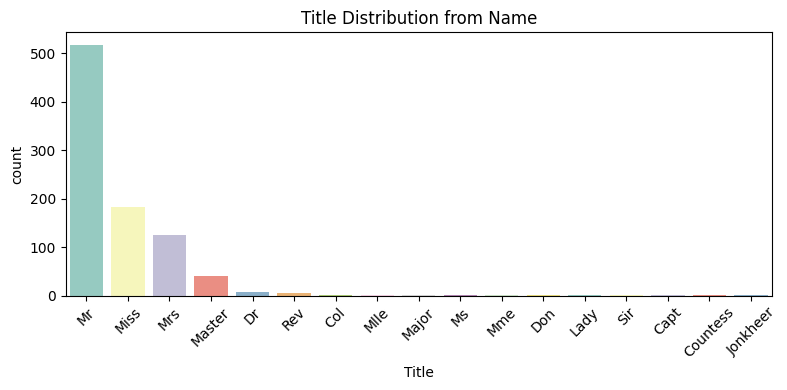

In [85]:
# Extract title for meaningful visualization
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

plt.figure(figsize=(8,4))
sns.countplot(data=train_df, x='Title', order=train_df['Title'].value_counts().index, palette='Set3')
plt.title("Title Distribution from Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


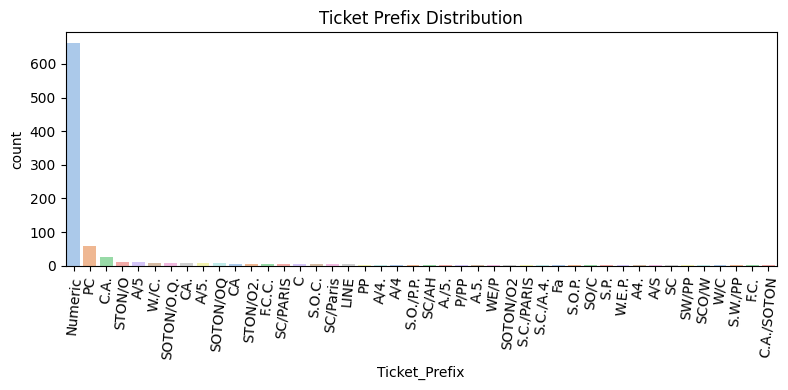

In [86]:
# Extract prefix (if any)
train_df['Ticket_Prefix'] = train_df['Ticket'].apply(lambda x: x.split()[0] if not x.isdigit() else 'Numeric')

plt.figure(figsize=(8,4))
sns.countplot(data=train_df, x='Ticket_Prefix', palette='pastel', order=train_df['Ticket_Prefix'].value_counts().index)
plt.title("Ticket Prefix Distribution")
plt.xticks(rotation=85)
plt.tight_layout()
plt.show()


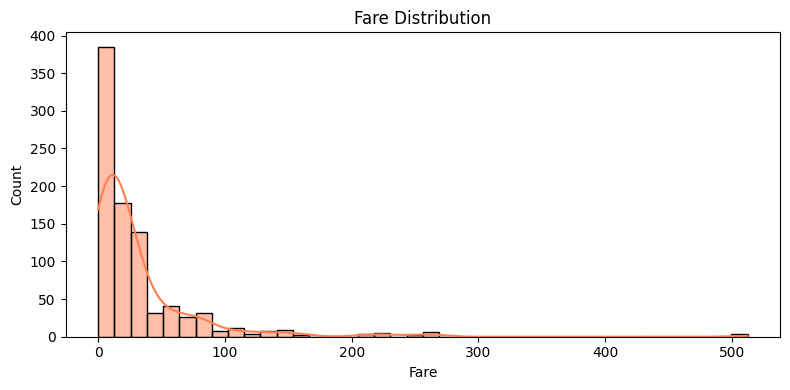

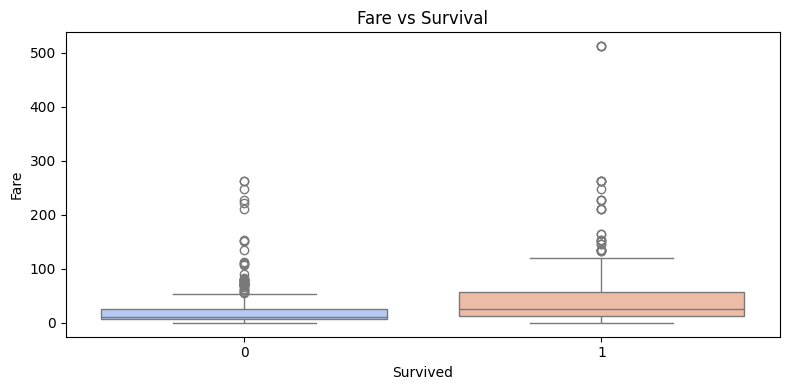

In [87]:
plt.figure(figsize=(8,4))
sns.histplot(train_df['Fare'], bins=40, kde=True, color='coral')
plt.title("Fare Distribution")
plt.tight_layout()
plt.show()

# Fare vs Survival
plt.figure(figsize=(8,4))
sns.boxplot(x='Survived', y='Fare', data=train_df, palette='coolwarm')
plt.title("Fare vs Survival")
plt.tight_layout()
plt.show()

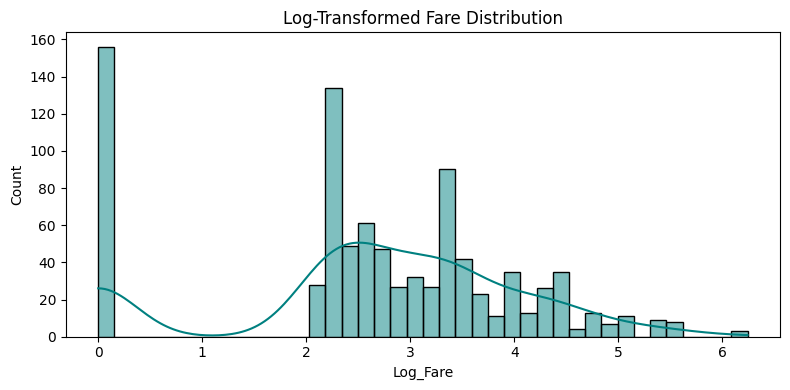

In [88]:
train_df['Log_Fare'] = np.log1p(train_df['Fare'])

plt.figure(figsize=(8,4))
sns.histplot(train_df['Log_Fare'], bins=40, kde=True, color='teal')
plt.title("Log-Transformed Fare Distribution")
plt.tight_layout()
plt.show()


<Axes: >

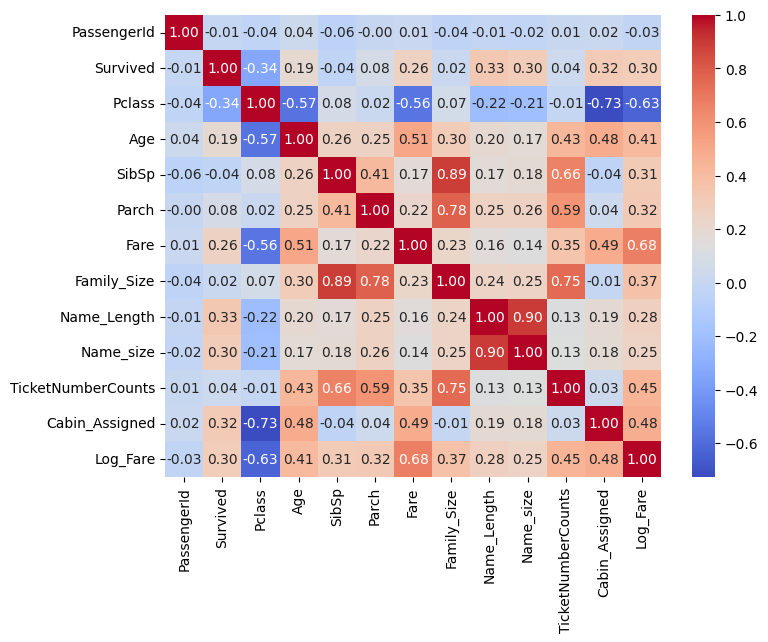

In [89]:
correlation_matrix= train_df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

## 📊 6. Encoding Categorical Variables
*Converting categorical features into numerical format.*

In [90]:
ohe= OneHotEncoder (sparse_output=False)
ode= OrdinalEncoder
SI= SimpleImputer (strategy='most_frequent')

In [91]:
ode_cols=['Family_Size_Grouped ']
ohe_cols=['Sex','Embarked']

In [92]:
X= train_df.drop(['Survived'], axis=1)
y=train_df['Survived']
X_test= test_df.drop(['Age_cut', 'Fare_cut'], axis=1)

In [93]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, stratify=y, random_state=21)

In [94]:
print(X_train.columns)
print(X_test.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size',
       'Family_Size_Grouped', 'Age_cut', 'Fare_cut', 'Title', 'Name_Length',
       'Name_LengthGB', 'Name_size', 'Ticket_Number', 'TicketNumberCounts',
       'Cabin_Assigned', 'Ticket_Prefix', 'Log_Fare'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size',
       'Family_Size_Grouped', 'Title', 'Name_Length', 'Name_LengthGB',
       'Name_size', 'Ticket_Number', 'TicketNumberCounts', 'Cabin_Assigned'],
      dtype='object')


In [95]:
print(repr(X_train.columns.tolist()))


['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Family_Size_Grouped', 'Age_cut', 'Fare_cut', 'Title', 'Name_Length', 'Name_LengthGB', 'Name_size', 'Ticket_Number', 'TicketNumberCounts', 'Cabin_Assigned', 'Ticket_Prefix', 'Log_Fare']


In [96]:
print(ohe_cols)
print(ode_cols)

['Sex', 'Embarked']
['Family_Size_Grouped ']


In [97]:
ohe_cols = [col.strip() for col in ohe_cols]
ode_cols = [col.strip() for col in ode_cols]
print(ohe_cols)
print(ode_cols)

['Sex', 'Embarked']
['Family_Size_Grouped']


In [98]:
X_train.columns = X_train.columns.str.strip()
X_test.columns = X_test.columns.str.strip()


In [99]:
print(X_train.dtypes)


PassengerId               int64
Pclass                    int64
Name                     object
Sex                      object
Age                     float64
SibSp                     int64
Parch                     int64
Ticket                   object
Fare                    float64
Cabin                    object
Embarked                 object
Family_Size               int64
Family_Size_Grouped      object
Age_cut                category
Fare_cut               category
Title                    object
Name_Length               int64
Name_LengthGB          category
Name_size               float64
Ticket_Number            object
TicketNumberCounts        int64
Cabin_Assigned            int64
Ticket_Prefix            object
Log_Fare                float64
dtype: object


In [100]:
train_df['TicketNumberCounts']

,TicketNumberCounts
0,1
1,1
2,1
3,2
4,1
...,...
886,1
887,1
888,2
889,1


In [101]:
#pipeline
ordinal_pipeline= Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [102]:
ohe_pipeline= Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [103]:
col_trans= ColumnTransformer(transformers=[
    ('impute', SI, ['Age']),
    ('ord_pipeline', ordinal_pipeline, ode_cols),
    ('ohe_pipeline', ohe_pipeline, ohe_cols),
    ('passthrough', 'passthrough', ['Pclass', 'TicketNumberCounts', 'Cabin_Assigned','Name_size','Age','Fare'])
    ],
    remainder='drop',
    n_jobs=-1)

## 🧪 8. Model Building & Evaluation
*Training various machine learning models like Logistic Regression, Random Forest, etc., and evaluating their performance.*

In [104]:
# Random Forest Classifier
rfc= RandomForestClassifier()

In [105]:
param_grid={
    'n_estimators': [100,150,200],
    'min_samples_split': [5,10,15],
    'max_depth': [8,9,10,15,20],
    'min_samples_leaf':[1,2,4],
    'criterion': ['gini','entropy'],
}

In [109]:
CV_rfc=GridSearchCV(estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [110]:
print(X_train.columns.tolist())


['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Family_Size_Grouped', 'Age_cut', 'Fare_cut', 'Title', 'Name_Length', 'Name_LengthGB', 'Name_size', 'Ticket_Number', 'TicketNumberCounts', 'Cabin_Assigned', 'Ticket_Prefix', 'Log_Fare']


In [111]:
pipefinalrfc = make_pipeline(col_trans, CV_rfc)
pipefinalrfc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [8, 9, 10, 15, 20],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [100, 150, 200]}))])

In [112]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 15, 'n_estimators': 100}
0.8061952132374668


In [138]:
# Make predictions on the validation set
y_pred = pipefinalrfc.predict(X_valid)

In [139]:
# Accuracy
acc = accuracy_score(y_valid, y_pred)
print("===== Random Forest Classifier =====")
print(f"Accuracy: {acc:.4f}")

===== Random Forest Classifier =====
Accuracy: 0.7933


In [115]:
# Classification report
print("Classification Report:")
print(classification_report(y_valid, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       110
           1       0.79      0.64      0.70        69

    accuracy                           0.79       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.79      0.79       179



In [116]:
# Confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[98 12]
 [25 44]]


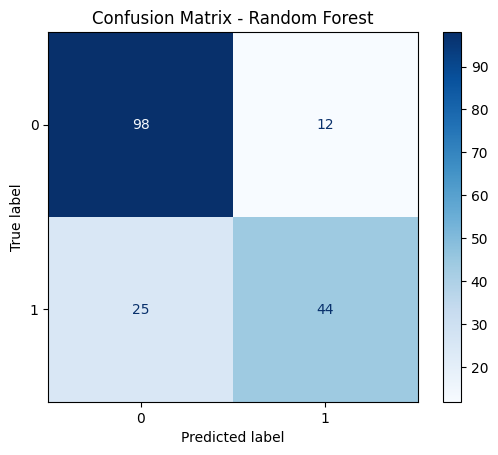

In [117]:
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [140]:
# Decision Tree Classifier
dtc= DecisionTreeClassifier()

In [141]:
param_grid={
    'min_samples_split': [5,10,15],
    'max_depth': [10,20,30],
    'min_samples_leaf':[1,2,4],
    'criterion': ['gini','entropy'],
}

In [144]:
CV_dtc=GridSearchCV(estimator=dtc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [145]:
pipefinaldtc= make_pipeline(col_trans, CV_dtc)
pipefinaldtc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [146]:
print(CV_dtc.best_params_)
print(CV_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 15}
0.7949571555205358


In [148]:
# Predict using Decision Tree
y_pred_dtc = pipefinaldtc.predict(X_valid)

In [149]:
# Accuracy
print("===== Decision Tree Classifier =====")
print(f"Accuracy: {accuracy_score(y_valid, y_pred_dtc):.4f}")

===== Decision Tree Classifier =====
Accuracy: 0.7989


In [150]:
# Classification Report
print("Classification Report:")
print(classification_report(y_valid, y_pred_dtc))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       110
           1       0.78      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179



In [151]:
# Confusion matrix
cm_dtc = confusion_matrix(y_valid, y_pred_dtc)
print("Confusion Matrix:")
print(cm_dtc)

Confusion Matrix:
[[97 13]
 [23 46]]


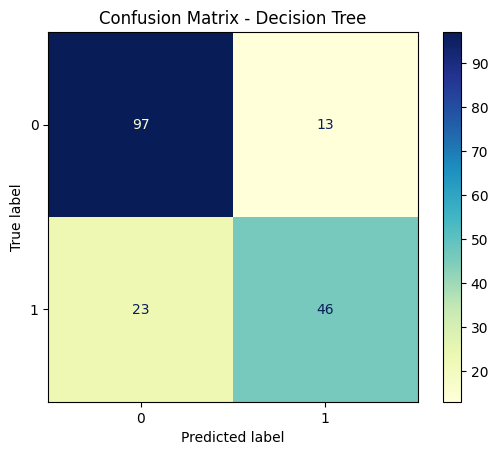

In [152]:
# Display Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=cm_dtc).plot(cmap='YlGnBu')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [153]:
# K Neighbors Classifier
knn= KNeighborsClassifier()

In [154]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # <- corrected from 'n_estimators' (also a potential issue)
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
}


In [155]:
CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [156]:
pipefinalknn = make_pipeline(col_trans, CV_knn)
pipefinalknn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [3, 5, 7, 9, 11],
                                          'p': [1, 2],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [157]:
print(CV_knn.best_params_)
print(CV_knn.best_score_)

{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.7879739978331527


In [158]:
# Predict using KNN
y_pred_knn = pipefinalknn.predict(X_valid)

In [159]:
# Accuracy
print("===== K Nearest Neighbors Classifier =====")
print(f"Accuracy: {accuracy_score(y_valid, y_pred_knn):.4f}")

===== K Nearest Neighbors Classifier =====
Accuracy: 0.7821


In [160]:
# Classification Report
print("Classification Report:")
print(classification_report(y_valid, y_pred_knn))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       110
           1       0.75      0.65      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



In [161]:
# Confusion matrix
cm_knn = confusion_matrix(y_valid, y_pred_knn)
print("Confusion Matrix:")
print(cm_knn)

Confusion Matrix:
[[95 15]
 [24 45]]


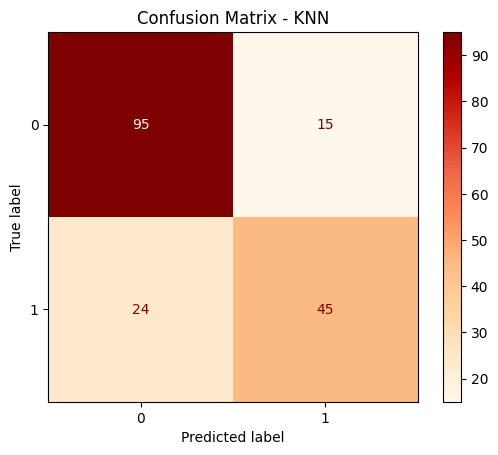

In [162]:
# Display Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=cm_knn).plot(cmap='OrRd')
plt.title("Confusion Matrix - KNN")
plt.show()

In [163]:
# Support Vector Classifier
svc= SVC()

In [164]:
param_grid={
    'C': [100,10,0.1,0.001,0.001],
    'kernel': ['linear','poly','rbf','sigmoid'],
}

In [165]:
CV_svc=GridSearchCV(estimator=svc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [166]:
pipefinalsvc= make_pipeline(col_trans, CV_svc)
pipefinalsvc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=SVC(),
                              param_grid={'C': [100, 10, 0.1, 0.001, 0.001],
                                          'kernel': ['linear', 'poly', 'rbf',
                                                     'sigmoid']}))])

In [167]:
print(CV_svc.best_params_)
print(CV_svc.best_score_)

{'C': 100, 'kernel': 'linear'}
0.79491775829804


In [168]:
# Predict using SVC
y_pred_svc = pipefinalsvc.predict(X_valid)

In [169]:
# Accuracy
print("===== Support Vector Classifier (SVC) =====")
print(f"Accuracy: {accuracy_score(y_valid, y_pred_svc):.4f}")

===== Support Vector Classifier (SVC) =====
Accuracy: 0.7598


In [170]:
# Classification Report
print("Classification Report:")
print(classification_report(y_valid, y_pred_svc))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       110
           1       0.71      0.64      0.67        69

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.76      0.76      0.76       179



In [171]:
# Confusion Matrix
cm_svc = confusion_matrix(y_valid, y_pred_svc)
print("Confusion Matrix:")
print(cm_svc)

Confusion Matrix:
[[92 18]
 [25 44]]


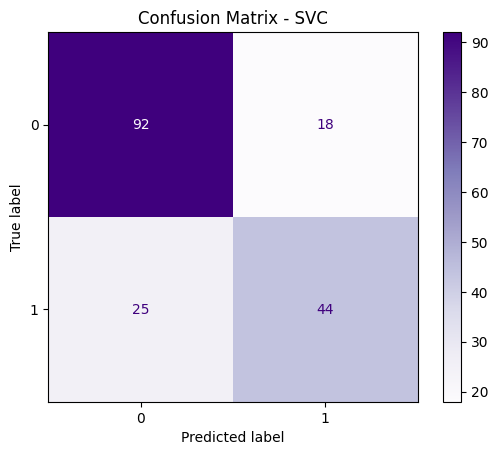

In [172]:
# Display
ConfusionMatrixDisplay(confusion_matrix=cm_svc).plot(cmap='Purples')
plt.title("Confusion Matrix - SVC")
plt.show()

In [173]:
# Logistic Regression
lr=LogisticRegression()

In [174]:
param_grid={
    'C': [100,10,0.1,0.001,0.001],
}

In [177]:
CV_lr=GridSearchCV(estimator=lr, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [178]:
pipefinallr= make_pipeline(col_trans, CV_lr)
pipefinallr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(),
                              param_grid={'C': [100, 10, 0.1, 0.001, 0.001]}))])

In [179]:
print(CV_lr.best_params_)
print(CV_lr.best_score_)

{'C': 0.1}
0.796375455530385


In [180]:
# Predict using Logistic Regression
y_pred_lr = pipefinallr.predict(X_valid)

In [181]:
# Accuracy
print("===== Logistic Regression =====")
print(f"Accuracy: {accuracy_score(y_valid, y_pred_lr):.4f}")

===== Logistic Regression =====
Accuracy: 0.8101


In [182]:
# Classification Report
print("Classification Report:")
print(classification_report(y_valid, y_pred_lr))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.70      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



In [183]:
# Confusion Matrix
cm_lr = confusion_matrix(y_valid, y_pred_lr)
print("Confusion Matrix:")
print(cm_lr)

Confusion Matrix:
[[97 13]
 [21 48]]


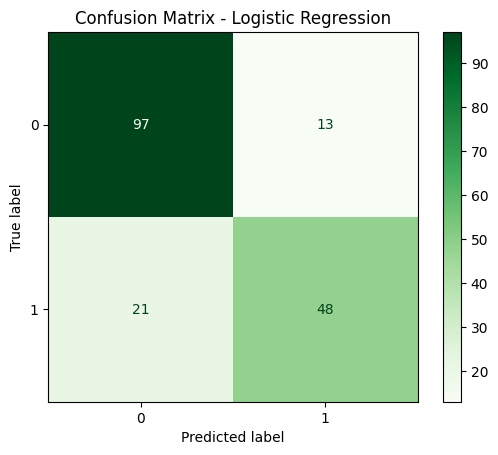

In [184]:
# Display
ConfusionMatrixDisplay(confusion_matrix=cm_lr).plot(cmap='Greens')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [185]:

# Naive Bayes
gnb= GaussianNB()

In [186]:

param_grid={
    'var_smoothing': [0.00000001,0.000000001,0.00000001],
}

In [187]:
CV_gnb=GridSearchCV(estimator=gnb, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [188]:
pipefinalgnb= make_pipeline(col_trans, CV_gnb)
pipefinalgnb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GaussianNB(),
                              param_grid={'var_smoothing': [1e-08, 1e-09,
                                                            1e-08]}))])

In [189]:
print(CV_gnb.best_params_)
print(CV_gnb.best_score_)

{'var_smoothing': 1e-08}
0.7711218359105684


In [190]:
# Predict using Naive Bayes
y_pred_gnb = pipefinalgnb.predict(X_valid)

In [191]:
# Accuracy
print("===== Gaussian Naive Bayes =====")
print(f"Accuracy: {accuracy_score(y_valid, y_pred_gnb):.4f}")

===== Gaussian Naive Bayes =====
Accuracy: 0.7709


In [192]:
# Classification Report
print("Classification Report:")
print(classification_report(y_valid, y_pred_gnb))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       110
           1       0.67      0.80      0.73        69

    accuracy                           0.77       179
   macro avg       0.76      0.78      0.77       179
weighted avg       0.78      0.77      0.77       179



In [193]:
# Confusion Matrix
cm_gnb = confusion_matrix(y_valid, y_pred_gnb)
print("Confusion Matrix:")
print(cm_gnb)

Confusion Matrix:
[[83 27]
 [14 55]]


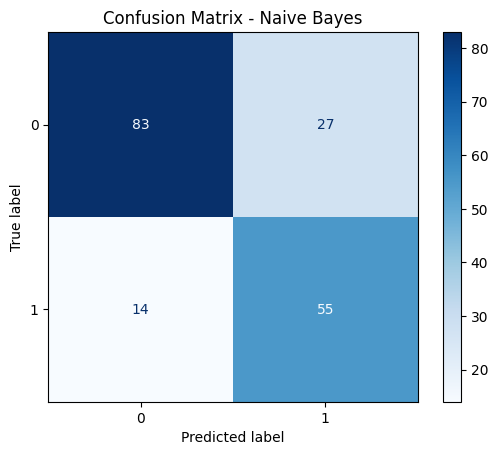

In [194]:
# Display
ConfusionMatrixDisplay(confusion_matrix=cm_gnb).plot(cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

In [202]:
X = train_df.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
y = train_df['Survived']

In [204]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the final pipeline including the ColumnTransformer and the RandomForestClassifier
# Use the best parameters found earlier for the RandomForestClassifier
final_model_pipeline = make_pipeline(col_trans, RandomForestClassifier(**CV_rfc.best_params_))
# Fit the final pipeline on the training data
final_model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_Assigned',
                                                   'Name_size', 'Age',
                                                   'Fare'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=8,
                                        min_samples_leaf=4,
                                        min_samples_split=15))])

In [205]:
# Make predictions on the validation set using the fitted pipeline
y_pred = final_model_pipeline.predict(X_val)

Validation Accuracy: 0.8044692737430168
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
[[91 14]
 [21 53]]


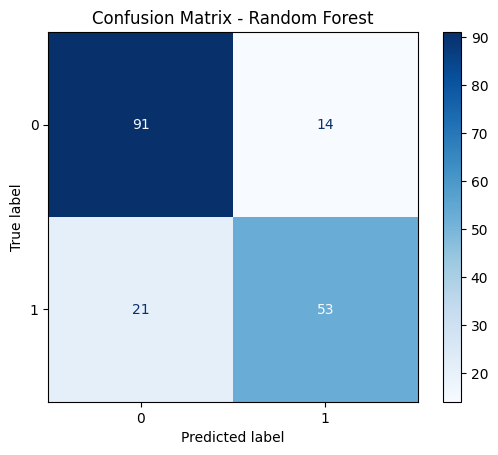

In [206]:
# Evaluate the model
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:")
print(classification_report(y_val, y_pred))
cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(cm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [207]:
# Prepare the test data and make predictions for submission

X_test_final = test_df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
predictions = final_model_pipeline.predict(X_test_final)

submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': predictions
})
submission.to_csv('titanic_submission.csv', index=False)

In [208]:
pd.read_csv('titanic_submission.csv').head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [209]:
from google.colab import files
files.download('titanic_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 🚢 Final Summary

The Titanic dataset provided a classic yet powerful opportunity to explore data-driven storytelling and predictive modeling. Through this project, we:

- Conducted extensive data cleaning and preprocessing, addressing missing values and transforming features for better usability.
- Performed exploratory data analysis (EDA) to uncover insightful relationships between variables like passenger class, gender, age, and survival likelihood.
- Engineered meaningful features such as title extraction from names, fare and age banding, and binary encoding for categorical variables to enhance model performance.
- Built and trained a classification model to predict passenger survival, and evaluated its accuracy using validation techniques.
- Generated predictions on the test dataset and successfully exported them for submission.

This project demonstrates the complete machine learning pipeline — from raw data to a working predictive model. It reflects practical skills in data wrangling, visualization, and model development using Python libraries such as Pandas, NumPy, Matplotlib, Seaborn, and Scikit-learn.

**Next steps** could include hyperparameter tuning, trying ensemble models like XGBoost, and applying cross-validation for more robust performance estimation.

With this, the Titanic machine learning project stands successfully completed. 🚢✨
